In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import pickle


In [15]:
# Load dataset with specified encoding
file_path = r'C:\Users\dell\Downloads\matern_ai\pregnancy_risk_prediction_data_set.csv'
# Try common encodings such as 'latin1', 'ISO-8859-1', or 'utf-16' if utf-8 fails
data = pd.read_csv(file_path, encoding='latin1')  # Change 'latin1' if needed

# Display the first few rows
print(data.head())


   Patient ID       Name  Age  Body Temperature(F)   Heart rate(bpm)  \
0     1994601     Moulya   20                  97.5               91   
1     2001562       Soni   45                  97.7               99   
2     2002530   Baishali   29                  98.6               84   
3     2002114  Abhilasha   26                  99.5              135   
4     2002058     Aanaya   38                 102.5               51   

   Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
0                             161                              100   
1                              99                               94   
2                             129                               87   
3                             161                              101   
4                             106                               91   

   BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  \
0         24.9                    41                                5.8

In [17]:
# Describe numerical variables
data.describe()

# Describe categorical variables
data['Outcome'].value_counts()


Outcome
high risk    2059
mid risk     2043
low risk     2001
Name: count, dtype: int64

In [19]:
# Reload dataset with a different encoding to handle the UnicodeDecodeError
data = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows and dataset info
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6103 entries, 0 to 6102
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Patient ID                         6103 non-null   int64  
 1   Name                               6103 non-null   object 
 2   Age                                6103 non-null   int64  
 3   Body Temperature(F)                6103 non-null   float64
 4   Heart rate(bpm)                    6103 non-null   int64  
 5   Systolic Blood Pressure(mm Hg)     6103 non-null   int64  
 6   Diastolic Blood Pressure(mm Hg)    6103 non-null   int64  
 7   BMI(kg/m 2)                        6103 non-null   float64
 8   Blood Glucose(HbA1c)               6103 non-null   int64  
 9   Blood Glucose(Fasting hour-mg/dl)  6103 non-null   float64
 10  Outcome                            6103 non-null   object 
dtypes: float64(3), int64(6), object(2)
memory usage: 524.6+ 

(   Patient ID       Name  Age  Body Temperature(F)   Heart rate(bpm)  \
 0     1994601     Moulya   20                  97.5               91   
 1     2001562       Soni   45                  97.7               99   
 2     2002530   Baishali   29                  98.6               84   
 3     2002114  Abhilasha   26                  99.5              135   
 4     2002058     Aanaya   38                 102.5               51   
 
    Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
 0                             161                              100   
 1                              99                               94   
 2                             129                               87   
 3                             161                              101   
 4                             106                               91   
 
    BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  \
 0         24.9                    41                   

In [23]:
# Check for duplicate rows
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates (if any)
data = data.drop_duplicates()


Number of duplicate rows: 0


In [25]:
# Remove rows with unrealistic age and diastolic blood pressure
data = data[(data['Age'] <= 200) & (data['Diastolic Blood Pressure(mm Hg)'] >= 20)]


In [27]:
# Drop unnecessary columns
data = data.drop(columns=['Patient ID', 'Name'])


In [29]:
# Step 5: Remove rows with age > 200 and Diastolic Blood Pressure < 20
data = data[(data['Age'] <= 200) & (data['Diastolic Blood Pressure(mm Hg)'] >= 20)]

# Display the first few rows of the updated dataset
print(data.head())

# Display the shape of the updated dataset to see the number of rows and columns
print(f"Updated dataset shape: {data.shape}")


   Age  Body Temperature(F)   Heart rate(bpm)  Systolic Blood Pressure(mm Hg)  \
0   20                  97.5               91                             161   
1   45                  97.7               99                              99   
2   29                  98.6               84                             129   
3   26                  99.5              135                             161   
4   38                 102.5               51                             106   

   Diastolic Blood Pressure(mm Hg)  BMI(kg/m 2)  Blood Glucose(HbA1c)  \
0                              100         24.9                    41   
1                               94         22.1                    36   
2                               87         19.0                    42   
3                              101         23.7                    46   
4                               91         18.8                    38   

   Blood Glucose(Fasting hour-mg/dl)    Outcome  
0                       

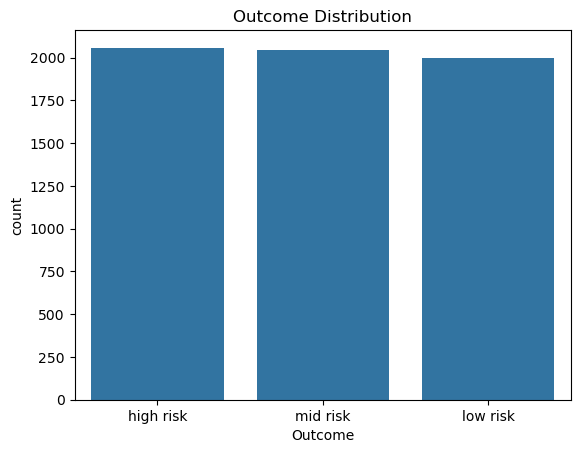

In [31]:
# Plot the outcome distribution
sns.countplot(data=data, x='Outcome')
plt.title("Outcome Distribution")
plt.show()


In [37]:
# Strip leading and trailing spaces from column names
data.columns = data.columns.str.strip()

# Verify the updated column names
print(data.columns)


Index(['Age', 'Body Temperature(F)', 'Heart rate(bpm)',
       'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
       'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
       'Blood Glucose(Fasting hour-mg/dl)', 'Outcome'],
      dtype='object')


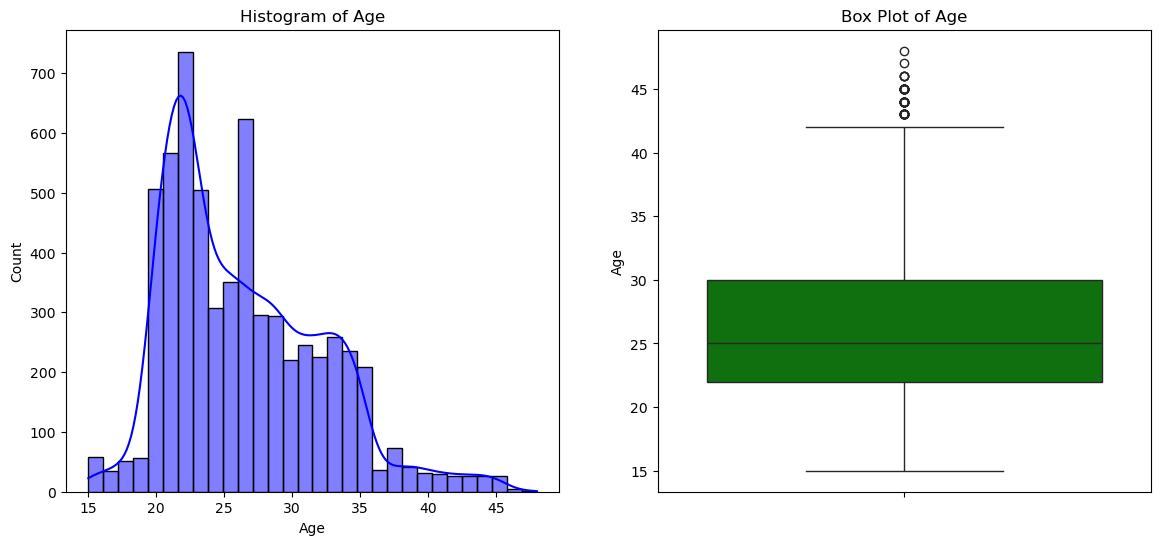

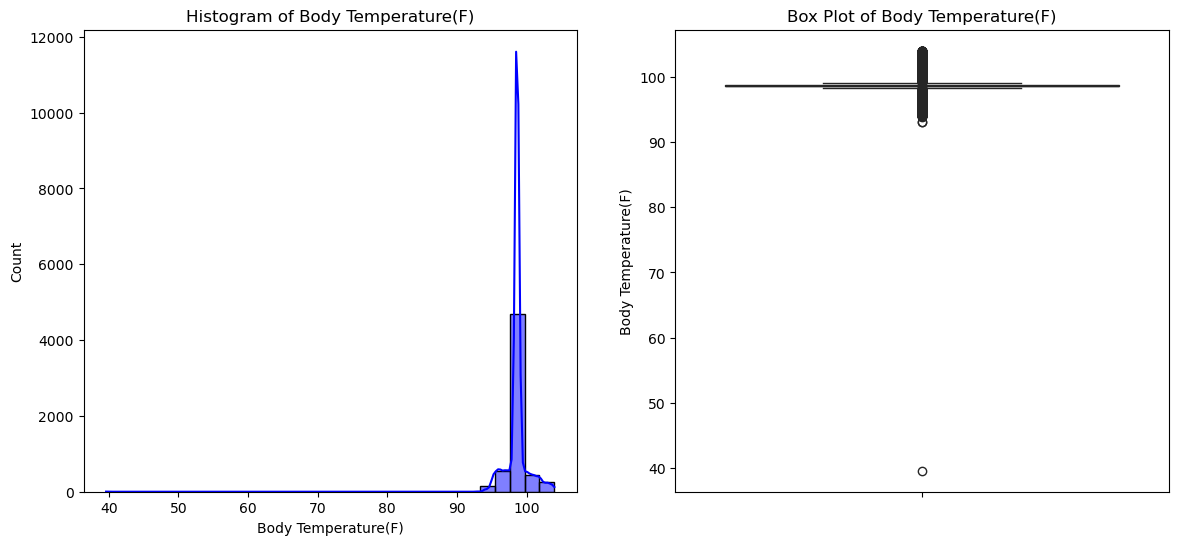

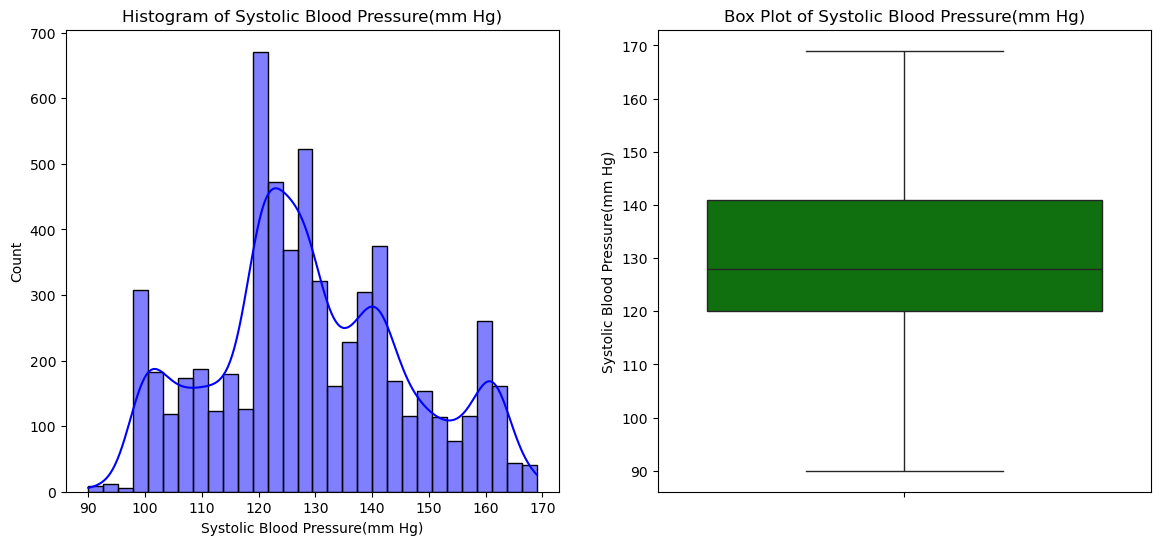

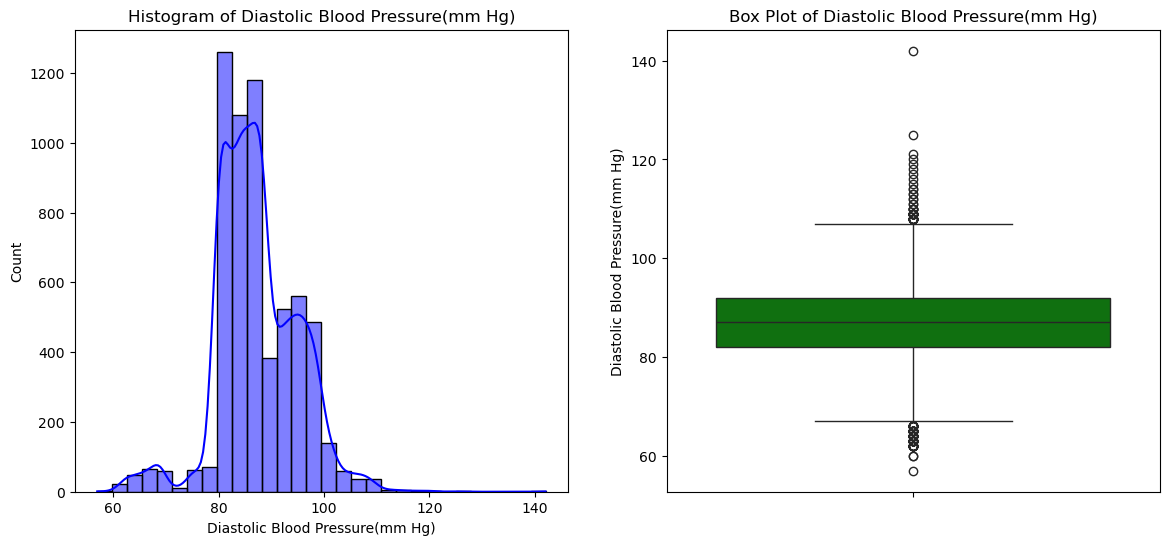

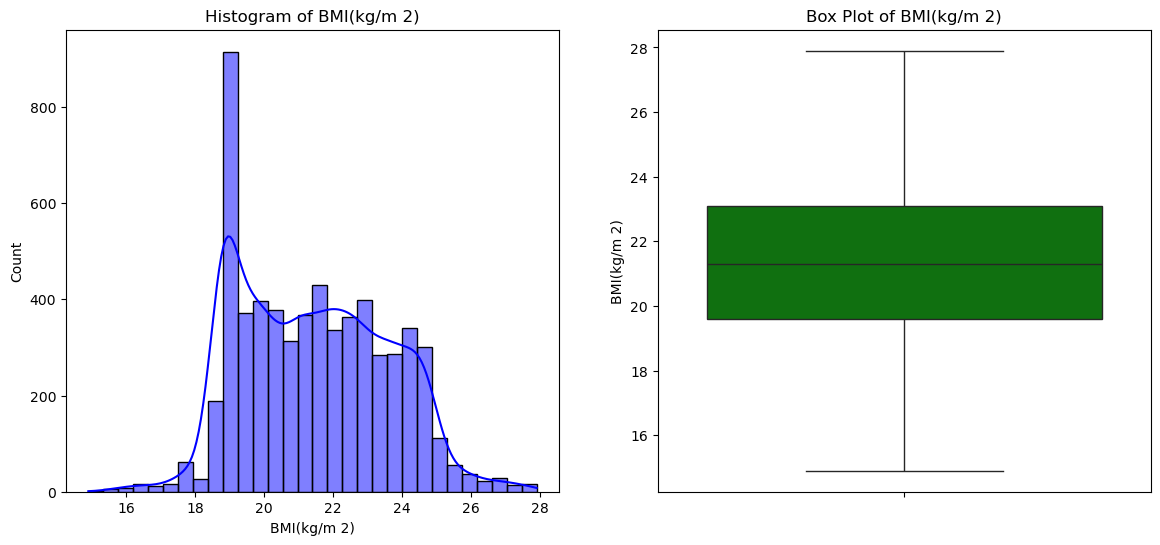

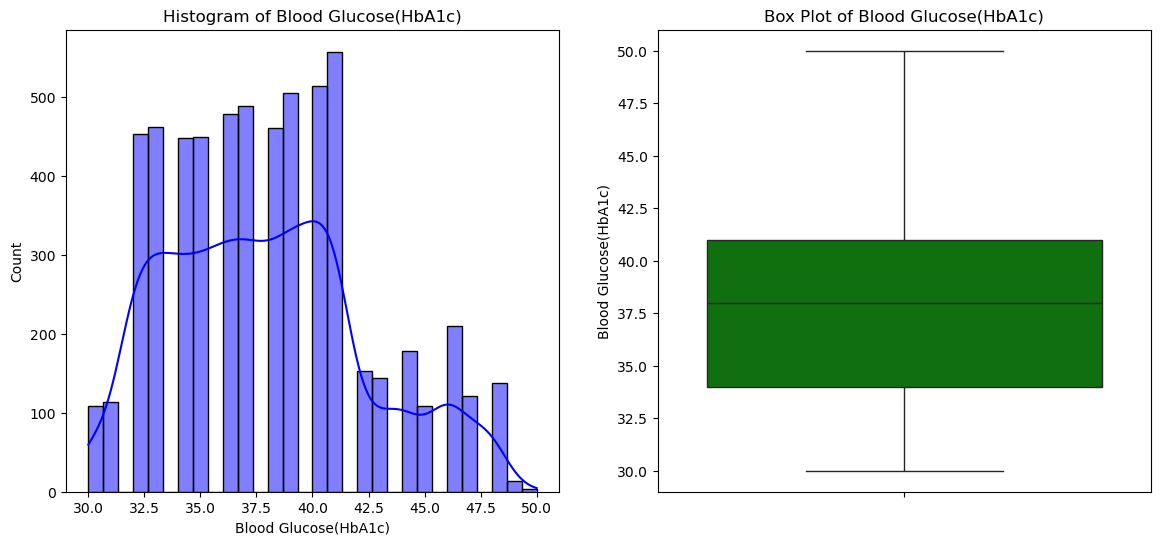

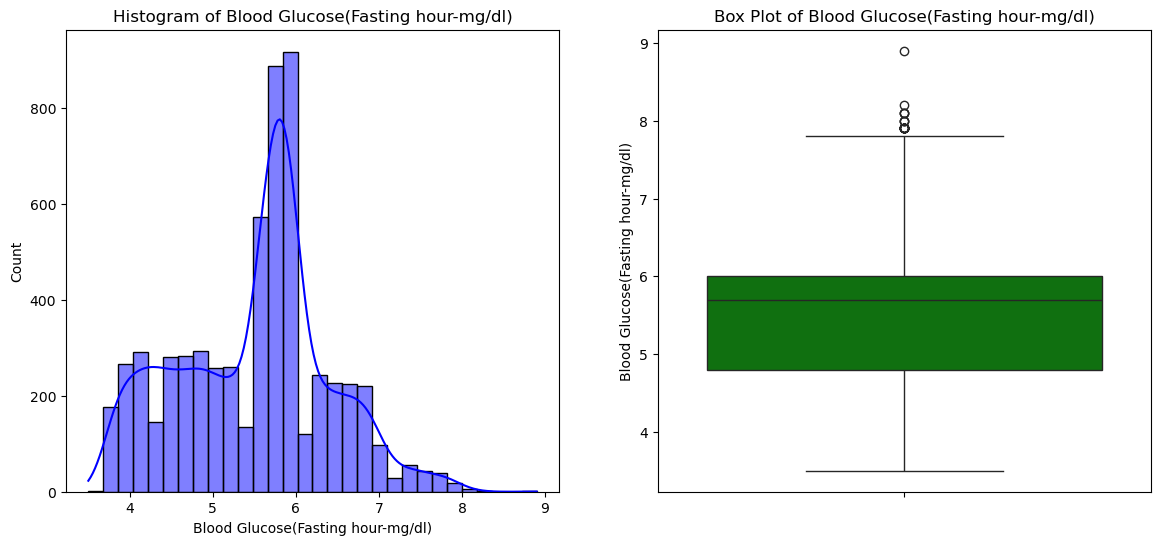

In [39]:
# Define numerical variables
numerical_columns = [
    'Age', 'Body Temperature(F)', 'Systolic Blood Pressure(mm Hg)', 
    'Diastolic Blood Pressure(mm Hg)', 'BMI(kg/m 2)', 
    'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)'
]

# Plot histograms and box plots
for column in numerical_columns:
    plt.figure(figsize=(14, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {column}')
    
    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(data[column], color='green')
    plt.title(f'Box Plot of {column}')
    
    plt.show()


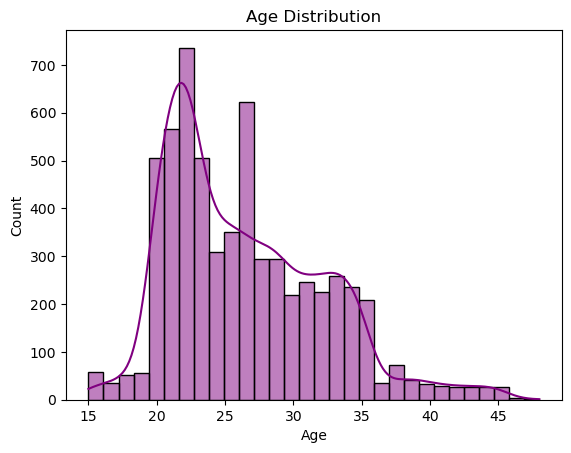

In [41]:
# Rows with age 250 have already been removed in Step 5

# Plot age distribution
sns.histplot(data['Age'], kde=True, bins=30, color='purple')
plt.title("Age Distribution")
plt.show()


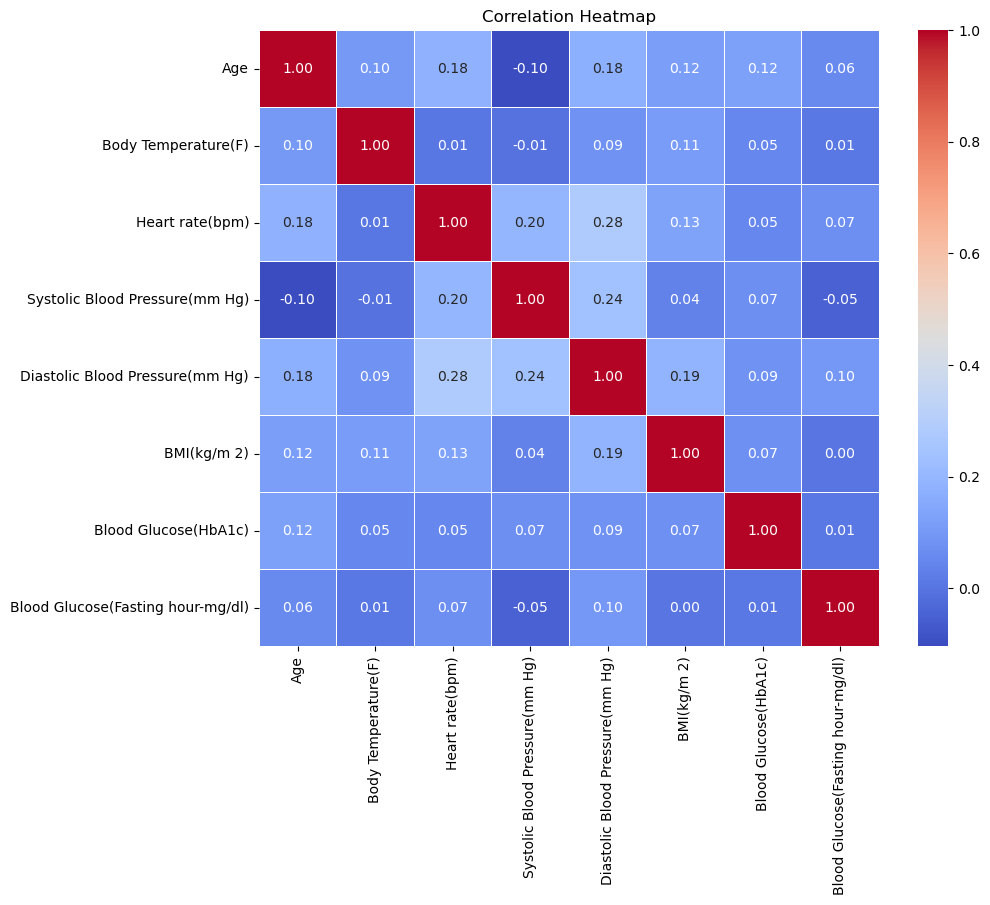

In [45]:
# Include only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [47]:
# Split data into predictors (X) and target (y)
X = data.drop(columns=['Outcome'])  # Predictors
y = data['Outcome']                # Target variable


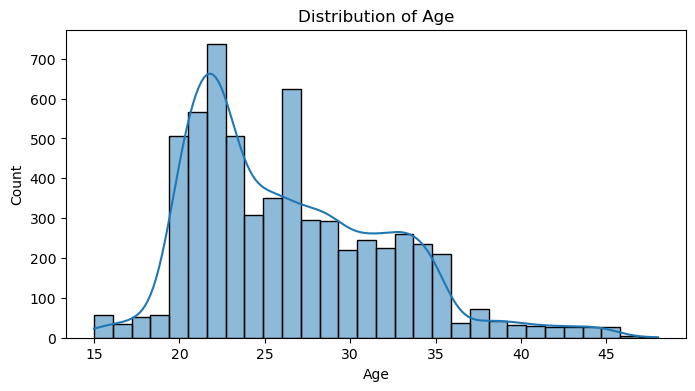

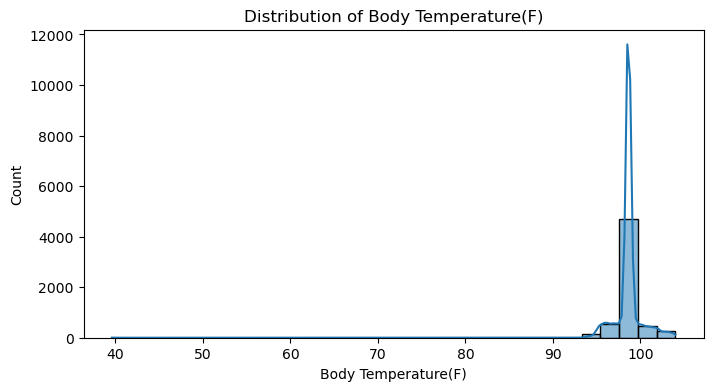

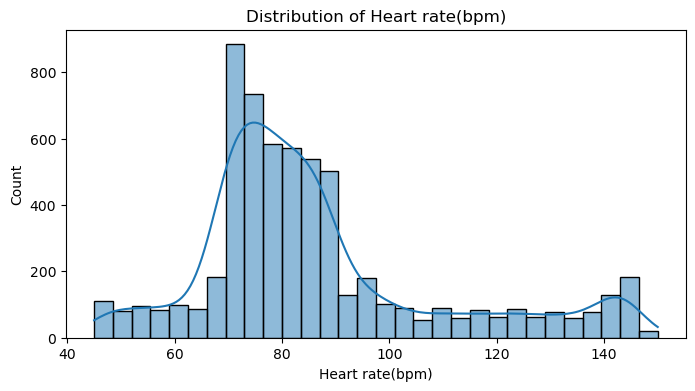

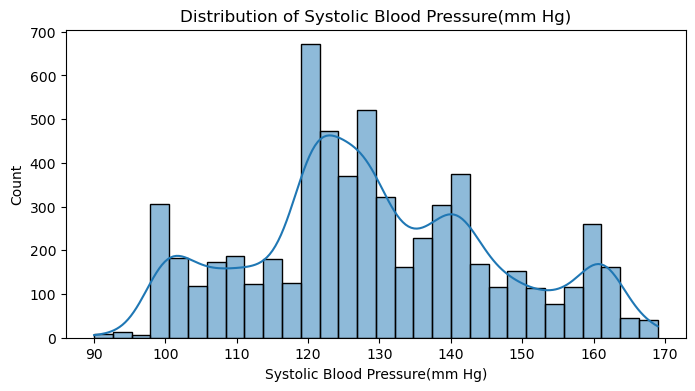

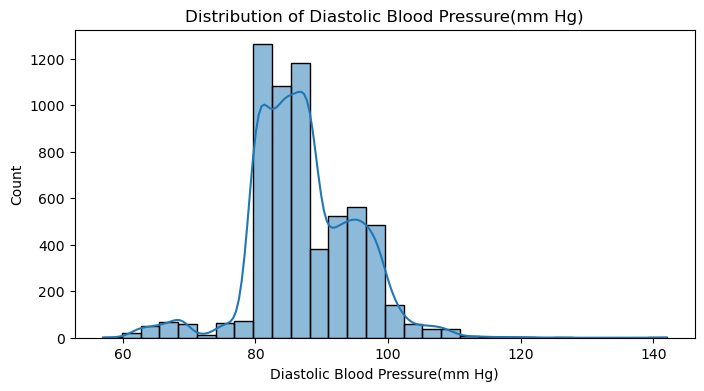

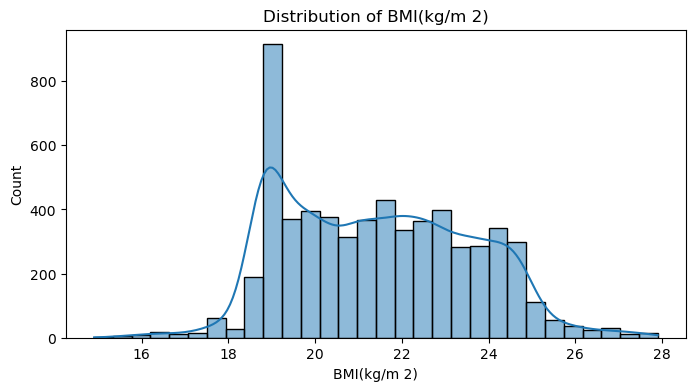

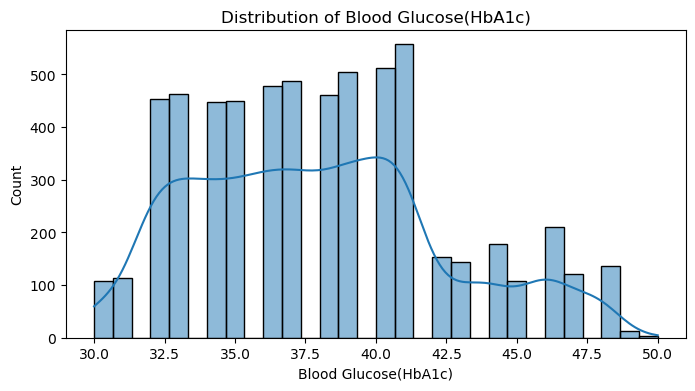

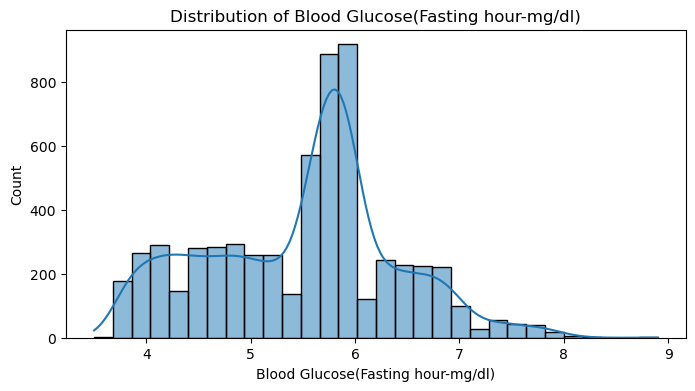

In [49]:
# Plot the distribution of each numerical variable
for column in X.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(X[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.show()


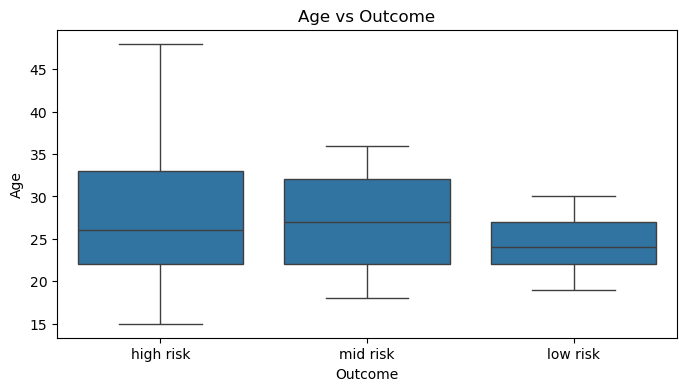

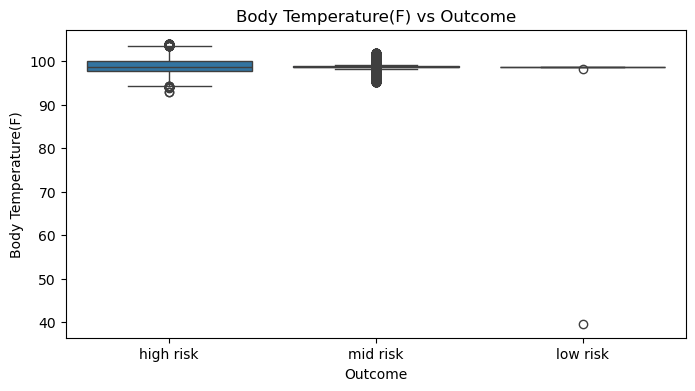

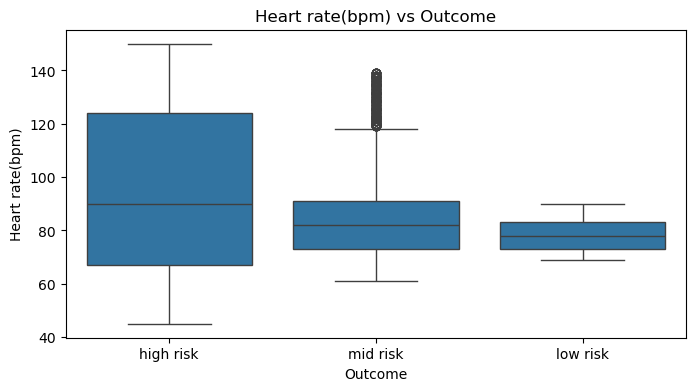

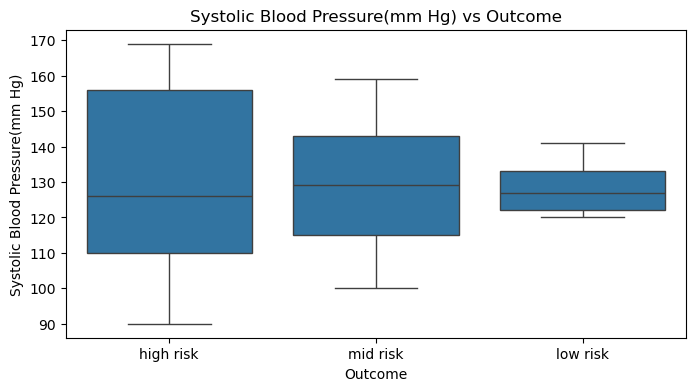

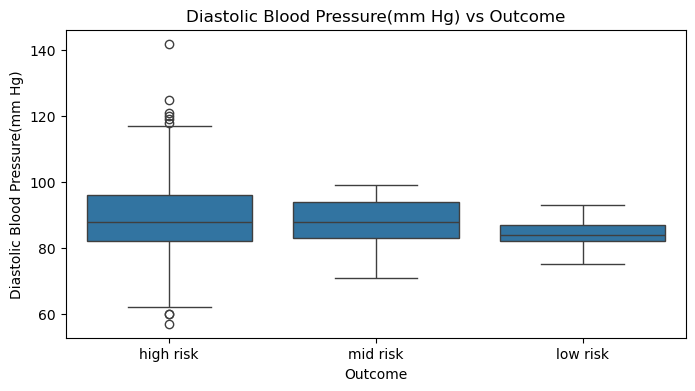

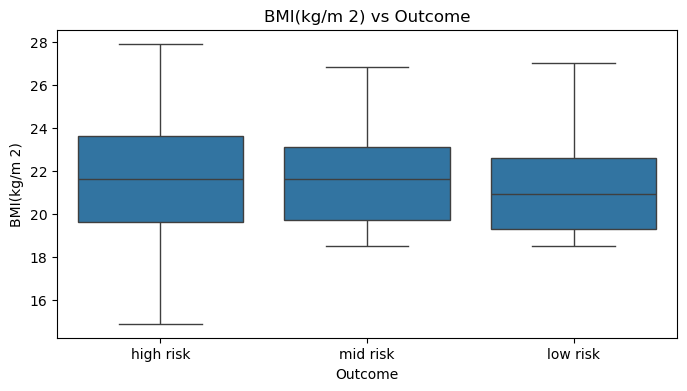

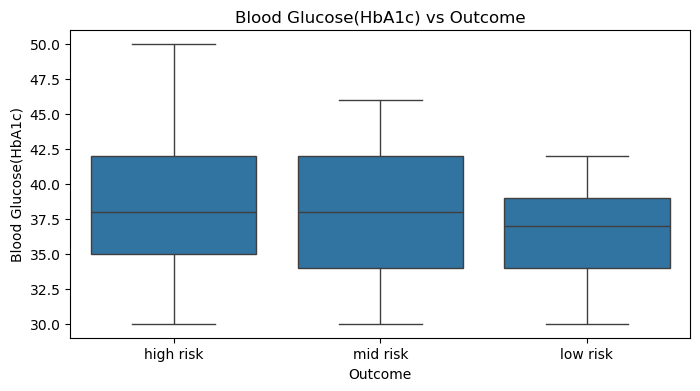

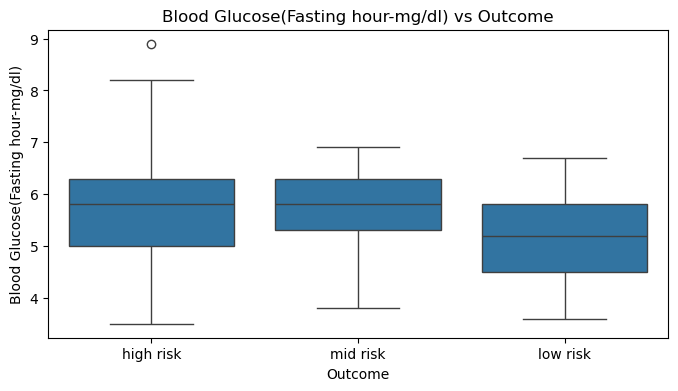

In [51]:
# Box plot to compare numerical features across outcomes
for column in X.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=y, y=X[column])
    plt.title(f"{column} vs Outcome")
    plt.show()


In [53]:
# Calculate Z-scores for each numerical column
z_scores = X.apply(zscore)

# Identify rows with Z-score > 3 (outliers)
outliers = (z_scores > 3).any(axis=1)

# Remove outliers from the dataset
X = X[~outliers]
y = y[~outliers]

print(f"Number of rows after outlier removal: {X.shape[0]}")


Number of rows after outlier removal: 5975


C:\Users\dell\AppData\Local\Temp\ipykernel_20216\1514722013.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")


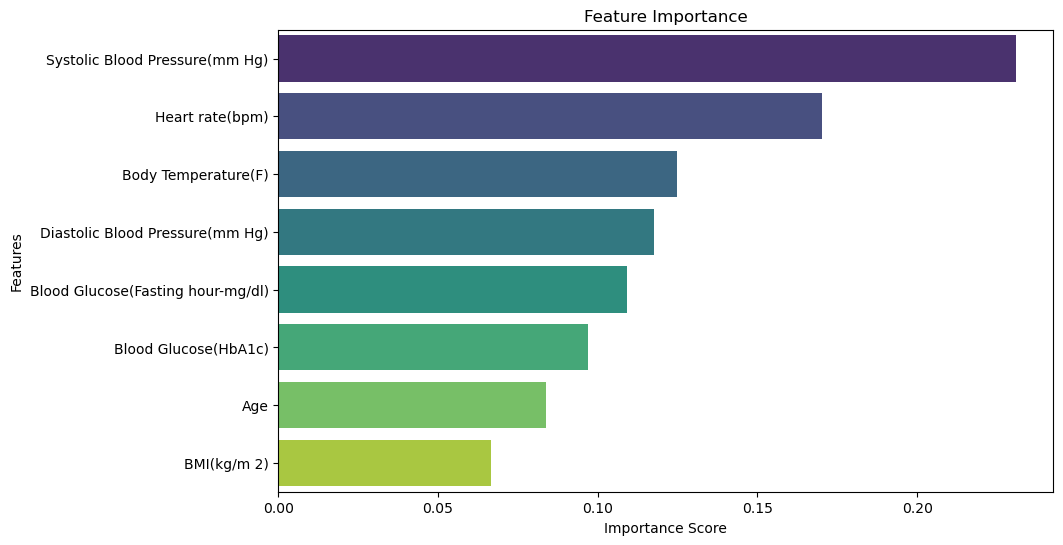

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest model for feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the predictors
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Print model performance
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(classification_report(y_test, y_pred_log_reg))

print("\nRandom Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(classification_report(y_test, y_pred_rf))


Logistic Regression:
Accuracy: 0.59
              precision    recall  f1-score   support

   high risk       0.59      0.48      0.53       387
    low risk       0.63      0.74      0.68       419
    mid risk       0.54      0.54      0.54       389

    accuracy                           0.59      1195
   macro avg       0.59      0.59      0.58      1195
weighted avg       0.59      0.59      0.58      1195


Random Forest:
Accuracy: 0.99
              precision    recall  f1-score   support

   high risk       0.99      0.99      0.99       387
    low risk       1.00      1.00      1.00       419
    mid risk       0.98      0.99      0.99       389

    accuracy                           0.99      1195
   macro avg       0.99      0.99      0.99      1195
weighted avg       0.99      0.99      0.99      1195



In [63]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now, `y_train_encoded` and `y_test_encoded` will contain numeric values (e.g., 0, 1, 2)



Logistic Regression:
Accuracy: 0.59
              precision    recall  f1-score   support

           0       0.59      0.48      0.53       387
           1       0.63      0.74      0.68       419
           2       0.54      0.54      0.54       389

    accuracy                           0.59      1195
   macro avg       0.59      0.59      0.58      1195
weighted avg       0.59      0.59      0.58      1195



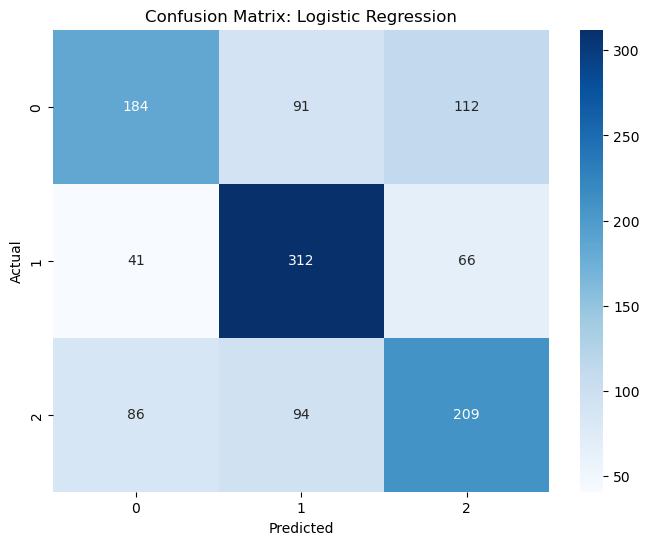


K-Nearest Neighbors:
Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       387
           1       0.92      0.99      0.95       419
           2       0.87      0.88      0.87       389

    accuracy                           0.91      1195
   macro avg       0.91      0.91      0.91      1195
weighted avg       0.91      0.91      0.91      1195



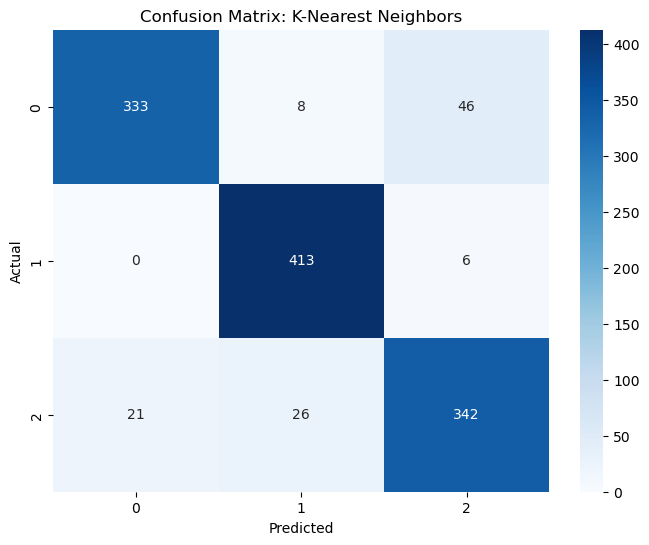


Support Vector Machine:
Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       387
           1       0.95      0.99      0.97       419
           2       0.90      0.91      0.91       389

    accuracy                           0.93      1195
   macro avg       0.93      0.93      0.93      1195
weighted avg       0.93      0.93      0.93      1195



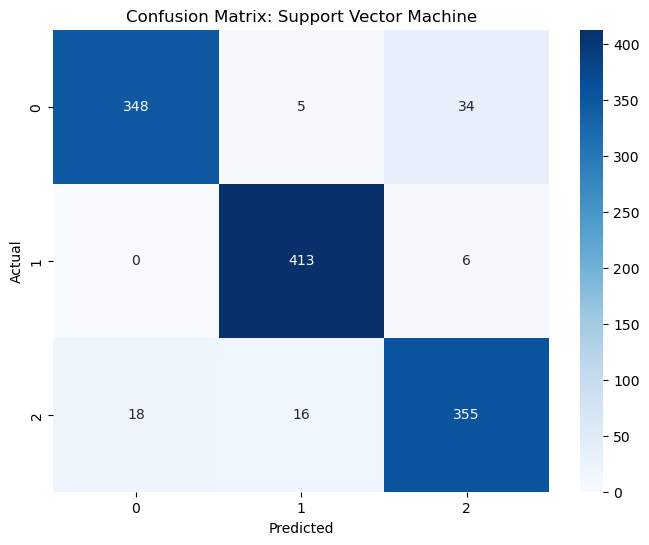

C:\Users\dell\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:48:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost:
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       387
           1       1.00      1.00      1.00       419
           2       0.98      0.99      0.99       389

    accuracy                           0.99      1195
   macro avg       0.99      0.99      0.99      1195
weighted avg       0.99      0.99      0.99      1195



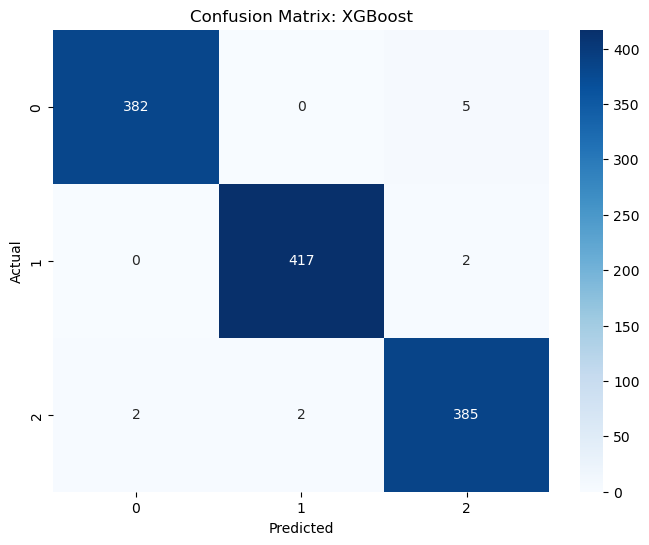


Random Forest:
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       387
           1       1.00      1.00      1.00       419
           2       0.98      0.99      0.99       389

    accuracy                           0.99      1195
   macro avg       0.99      0.99      0.99      1195
weighted avg       0.99      0.99      0.99      1195



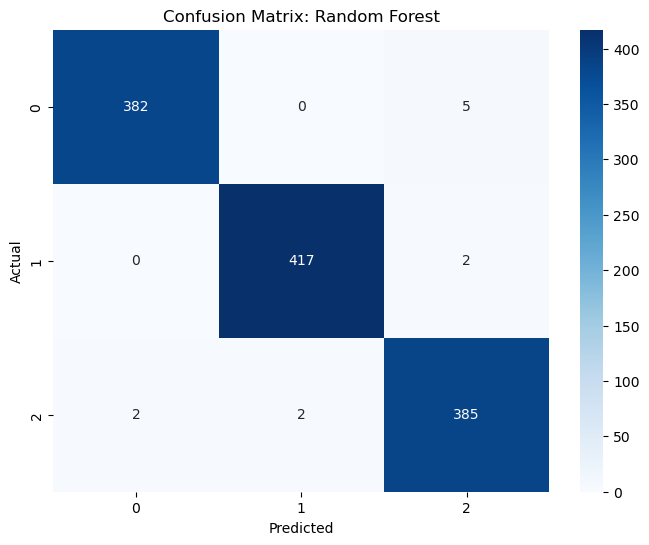

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train and evaluate models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train_encoded)
    
    # Predict using the model
    y_pred = model.predict(X_test)
    
    # Convert predictions back to original labels
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    
    # Print model performance
    print(f"\n{model_name}:")
    print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred):.2f}")
    print(classification_report(y_test_encoded, y_pred))
    
    # Plot Confusion Matrix
    conf_matrix = confusion_matrix(y_test_encoded, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [67]:
import joblib

# Save all models and the scaler
for model_name, model in models.items():
    joblib.dump(model, f'{model_name.lower().replace(" ", "_")}_model.pkl')

# Save the scaler for future use
joblib.dump(scaler, 'scaler.pkl')

print("Models and scaler saved successfully!")



Models and scaler saved successfully!


In [71]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train_encoded)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Print the best hyperparameters
print(f"Best Random Forest Parameters: {grid_search_rf.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_rf.best_score_:.2f}")

# Evaluate the tuned model on the test set
y_pred_tuned_rf = best_rf_model.predict(X_test)
print(f"Tuned Random Forest Accuracy: {accuracy_score(y_test_encoded, y_pred_tuned_rf):.2f}")
print(classification_report(y_test_encoded, y_pred_tuned_rf))


Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.99
Tuned Random Forest Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       387
           1       1.00      1.00      1.00       419
           2       0.98      0.99      0.99       389

    accuracy                           0.99      1195
   macro avg       0.99      0.99      0.99      1195
weighted avg       0.99      0.99      0.99      1195




Final Model Evaluation:
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       387
           1       1.00      1.00      1.00       419
           2       0.98      0.99      0.99       389

    accuracy                           0.99      1195
   macro avg       0.99      0.99      0.99      1195
weighted avg       0.99      0.99      0.99      1195



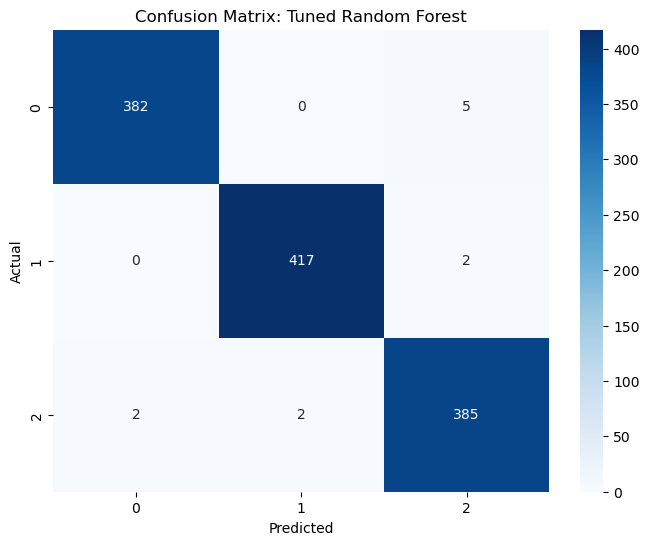

In [72]:
# Final model evaluation
y_pred_final = best_rf_model.predict(X_test)

print("\nFinal Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_final):.2f}")
print(classification_report(y_test_encoded, y_pred_final))

# Plot Confusion Matrix
conf_matrix_final = confusion_matrix(y_test_encoded, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_final, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [75]:
import joblib

# Save the best model
joblib.dump(best_rf_model, 'tuned_random_forest_model.pkl')

# Save the scaler for future use
joblib.dump(scaler, 'scaler.pkl')

print("Final model and scaler saved successfully!")



Final model and scaler saved successfully!


In [81]:
# If X_train is initially a DataFrame, print the column names before splitting
print(X.columns)  # X is the original dataset features DataFrame before the split



Index(['Age', 'Body Temperature(F)', 'Heart rate(bpm)',
       'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
       'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
       'Blood Glucose(Fasting hour-mg/dl)'],
      dtype='object')


In [83]:
# Print feature names from the original dataset
print(X.columns)  # This will print column names before splitting into train/test


Index(['Age', 'Body Temperature(F)', 'Heart rate(bpm)',
       'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
       'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
       'Blood Glucose(Fasting hour-mg/dl)'],
      dtype='object')


In [93]:
# Example input data
sample_input = [25, 98.6, 120, 80, 22, 5.5, 90, 1]  # 8 values for 8 features


In [99]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Assuming 'y' is your target variable (e.g., 'risk_level')
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode the target labels

# Save the label encoder for future use
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

In [103]:
print(X_train.shape)
print(len(y_encoded))  # This should be the same as X_train.shape[0]


(4780, 8)
5975


In [107]:
# Check the column names in your DataFrame
print(data.columns)


Index(['Age', 'Body Temperature(F)', 'Heart rate(bpm)',
       'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
       'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
       'Blood Glucose(Fasting hour-mg/dl)', 'Outcome'],
      dtype='object')


In [125]:
import joblib

def get_user_input():
    # Get user input for each feature (adjust this as per your dataset)
    age = float(input("Enter Age: "))
    body_temp = float(input("Enter Body Temperature (Fahrenheit): "))
    heart_rate = float(input("Enter Heart Rate (beats per minute): "))  # Heart rate now before blood pressure
    systolic_bp = float(input("Enter Systolic Blood Pressure: "))
    diastolic_bp = float(input("Enter Diastolic Blood Pressure: "))
    bmi = float(input("Enter BMI (kg/m^2): "))
    blood_glucose = float(input("Enter Blood Glucose (mg/dl): "))
    blood_glucose_fasting = float(input("Enter Blood Glucose (Fasting - mg/dl): "))
    
    # Combine all features into a single list (now includes heart rate before blood pressure)
    input_data = [age, body_temp, heart_rate, systolic_bp, diastolic_bp, bmi, blood_glucose, blood_glucose_fasting]
    
    return input_data

def predict_risk(input_data, model_name="random forest"):
    # Load the scaler and the trained model
    scaler = joblib.load('scaler.pkl')  # Load the scaler
    model = joblib.load(f'{model_name.lower().replace(" ", "_")}_model.pkl')  # Load the model
    
    # Scale the input data (make sure it has the correct shape)
    input_data_scaled = scaler.transform([input_data])  # Scale input

    # Predict the risk level
    prediction = model.predict(input_data_scaled)
    
    return prediction[0]  # Return the predicted value

def main():
    # Get user input
    user_input = get_user_input()
    
    # Predict risk using the model
    predicted_risk = predict_risk(user_input, model_name="random forest")
    
    # Convert numerical prediction back to human-readable form
    label_encoder = joblib.load('label_encoder.pkl')  # Load label encoder
    predicted_risk_label = label_encoder.inverse_transform([predicted_risk])[0]
    
    print(f"Predicted Risk Level: {predicted_risk_label}")

if __name__ == "__main__":
    main()


Enter Age:  60
Enter Body Temperature (Fahrenheit):  98.6
Enter Heart Rate (beats per minute):  90
Enter Systolic Blood Pressure:  160
Enter Diastolic Blood Pressure:  100
Enter BMI (kg/m^2):  35
Enter Blood Glucose (mg/dl):  180
Enter Blood Glucose (Fasting - mg/dl):  140


Predicted Risk Level: high risk


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
